In [57]:
import pandas as pd
df = pd.read_csv(r"C:\Users\DELL\Downloads\Churn_Modelling.csv")

In [58]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [59]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [61]:
numeric_cols = df.select_dtypes(include = 'number').columns
print(numeric_cols)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


<Axes: >

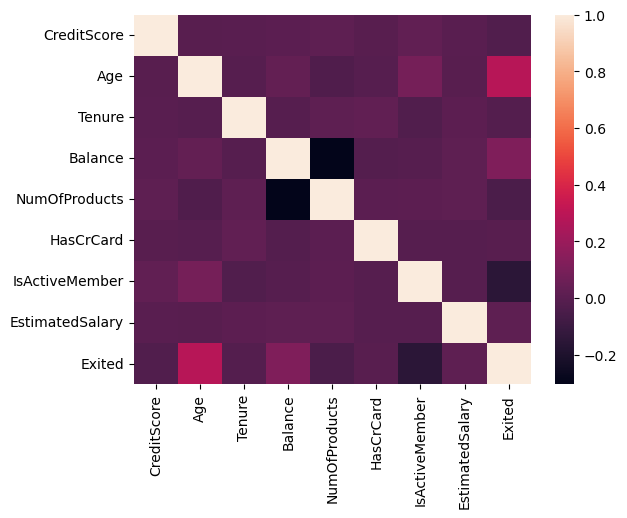

In [62]:
sns.heatmap(df[numeric_cols].corr())

In [63]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=False)

In [64]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [66]:
from sklearn.model_selection import train_test_split
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
}

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print('-' * 15)

Logistic Regression Accuracy: 81.15%
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1544   63]
 [ 314   79]]
ROC AUC Score: 0.7789331344578665
---------------
Decision Tree Accuracy: 77.80%
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.44      0.51      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000

Confusion Matrix:
 [[1356  251]
 [ 193  200]]
ROC AUC Score: 0.6763570954681412
---------------
Support Vector Classifier Accuracy: 86.05%
              precision    recall  f1-score

In [81]:
import numpy as np

yeni_musteri = np.array([[600, 47, 2, 90000, 2, 0, 0, 1, 0, 1, 0, 1]])  

yeni_musteri[:, :6] = scaler.transform(yeni_musteri[:, :6])


churn_olasiligi = models["Gradient Boosting Classifier"].predict_proba(yeni_musteri)[:, 1]

print(f"Müşterinin Churn Olma Olasılığı: {churn_olasiligi[0]:.2f}")

if churn_olasiligi[0] > 0.5:
    print("Bu müşteri büyük ihtimalle bankadan ayrılacak.")
else:
    print("Bu müşteri bankada kalacak.")


Müşterinin Churn Olma Olasılığı: 0.05
Bu müşteri bankada kalacak.


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [82]:
import numpy as np

yeni_musteri = np.array([[350, 19, 0, 20000000, 2, 0, 1, 0, 1, 0, 10000000, 0]])  

yeni_musteri[:, :6] = scaler.transform(yeni_musteri[:, :6])

churn_olasiligi = models["Gradient Boosting Classifier"].predict_proba(yeni_musteri)[:, 1]

print(f"Müşterinin Churn Olma Olasılığı: {churn_olasiligi[0]:.2f}")

if churn_olasiligi[0] > 0.5:
    print("Bu müşteri büyük ihtimalle bankadan ayrılacak.")
else:
    print("Bu müşteri bankada kalacak.")


Müşterinin Churn Olma Olasılığı: 0.84
Bu müşteri büyük ihtimalle bankadan ayrılacak.


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
